# 1.  Imports and Libraries

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Importing the dataset that was created in notebook 2.  

In [2]:
# Import dataset

df = pd.read_csv('./Data/haz_census3.csv').drop(columns=['unnamed:_0', 'Unnamed: 0'])
df.head()

,pin10,est_year_construction,pct_minority,pct_single_partent_families,pct_non_english_speakers,median_hh_income,pct_hh_below_poverty,pct_hh_with_children,resident_type,hyd_year_stamped,...,type_of_residence,building_square_feet,prior_tax_year_market_value_estimate_(land),prior_tax_year_market_value_estimate_(building),longitude,latitude,census_tract,property_address,age,neighborhood_code.1
0,2930111009,1960,80.064309,57.913669,0,44107,20.967742,43.884892,two-story,2012,...,2.0,2063.0,13310.0,118330.0,-87.671160,41.583383,827700.0,16853 CRANE AVE,62,130
1,2930125045,1958,80.064309,57.913669,0,44107,20.967742,43.884892,1-plus-story,2012,...,5.0,768.0,15010.0,34560.0,-87.673116,41.580632,827700.0,2305 W 170TH ST,64,130
2,2825319003,1959,98.171846,49.226006,0,49239,17.184644,42.105263,split-level,1996,...,4.0,1411.0,21130.0,78440.0,-87.691318,41.573429,825503.0,3105 LONGFELLOW AVE,63,260
3,2930115006,1967,93.566176,65.337423,0,35789,7.720588,45.398773,two-story,1988,...,2.0,1823.0,12430.0,76210.0,-87.666394,41.583720,827700.0,16833 SHEA AVE,55,130
4,2825321029,1962,98.171846,49.226006,0,49239,17.184644,42.105263,one-story,1928,...,1.0,1602.0,35360.0,73160.0,-87.690178,41.574146,825503.0,3017 LONGFELLOW AVE,60,260


In [3]:
# Checking dataset shape
df.shape

(3757, 25)

In [4]:
# Checking dataset datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 25 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   pin10                                            3757 non-null   int64  
 1   est_year_construction                            3757 non-null   int64  
 2   pct_minority                                     3757 non-null   float64
 3   pct_single_partent_families                      3757 non-null   float64
 4   pct_non_english_speakers                         3757 non-null   int64  
 5   median_hh_income                                 3757 non-null   int64  
 6   pct_hh_below_poverty                             3757 non-null   float64
 7   pct_hh_with_children                             3757 non-null   float64
 8   resident_type                                    3757 non-null   object 
 9   hyd_year_stamped              

# 2.  EDA and Feature Engineering

In [5]:
# Checking object columns
df['resident_type'].value_counts()

one-story       1900
two-story       1067
split-level      656
1-plus-story     134
Name: resident_type, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 25 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   pin10                                            3757 non-null   int64  
 1   est_year_construction                            3757 non-null   int64  
 2   pct_minority                                     3757 non-null   float64
 3   pct_single_partent_families                      3757 non-null   float64
 4   pct_non_english_speakers                         3757 non-null   int64  
 5   median_hh_income                                 3757 non-null   int64  
 6   pct_hh_below_poverty                             3757 non-null   float64
 7   pct_hh_with_children                             3757 non-null   float64
 8   resident_type                                    3757 non-null   object 
 9   hyd_year_stamped              

In [7]:
df.shape

(3757, 25)

In [8]:
df.head()

,pin10,est_year_construction,pct_minority,pct_single_partent_families,pct_non_english_speakers,median_hh_income,pct_hh_below_poverty,pct_hh_with_children,resident_type,hyd_year_stamped,...,type_of_residence,building_square_feet,prior_tax_year_market_value_estimate_(land),prior_tax_year_market_value_estimate_(building),longitude,latitude,census_tract,property_address,age,neighborhood_code.1
0,2930111009,1960,80.064309,57.913669,0,44107,20.967742,43.884892,two-story,2012,...,2.0,2063.0,13310.0,118330.0,-87.671160,41.583383,827700.0,16853 CRANE AVE,62,130
1,2930125045,1958,80.064309,57.913669,0,44107,20.967742,43.884892,1-plus-story,2012,...,5.0,768.0,15010.0,34560.0,-87.673116,41.580632,827700.0,2305 W 170TH ST,64,130
2,2825319003,1959,98.171846,49.226006,0,49239,17.184644,42.105263,split-level,1996,...,4.0,1411.0,21130.0,78440.0,-87.691318,41.573429,825503.0,3105 LONGFELLOW AVE,63,260
3,2930115006,1967,93.566176,65.337423,0,35789,7.720588,45.398773,two-story,1988,...,2.0,1823.0,12430.0,76210.0,-87.666394,41.583720,827700.0,16833 SHEA AVE,55,130
4,2825321029,1962,98.171846,49.226006,0,49239,17.184644,42.105263,one-story,1928,...,1.0,1602.0,35360.0,73160.0,-87.690178,41.574146,825503.0,3017 LONGFELLOW AVE,60,260


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 25 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   pin10                                            3757 non-null   int64  
 1   est_year_construction                            3757 non-null   int64  
 2   pct_minority                                     3757 non-null   float64
 3   pct_single_partent_families                      3757 non-null   float64
 4   pct_non_english_speakers                         3757 non-null   int64  
 5   median_hh_income                                 3757 non-null   int64  
 6   pct_hh_below_poverty                             3757 non-null   float64
 7   pct_hh_with_children                             3757 non-null   float64
 8   resident_type                                    3757 non-null   object 
 9   hyd_year_stamped              

In [10]:
#df['prior_tax_year_market_value_estimate_(land)'] = df['prior_tax_year_market_value_estimate_(land)'].astype(np.int64)


In [11]:
# Creating new variable
df['prop_to_land_ratio'] = df['prior_tax_year_market_value_estimate_(building)'] / df['prior_tax_year_market_value_estimate_(land)']
df['prop_to_land_ratio']

0       8.890308
1       2.302465
2       3.712257
3       6.131134
4       2.069005
          ...   
3752    3.783287
3753    4.713999
3754    3.384805
3755    3.723242
3756    3.731902
Name: prop_to_land_ratio, Length: 3757, dtype: float64

In [12]:
df.shape

(3757, 26)

In [13]:
# Chechink the categories of the lead
df['prob_g_lsl'].value_counts()

Maybe Lead          1501
Unlikely Lead       1267
Assumed Non-Lead     480
Likely Lead          479
Assumed Lead          30
Name: prob_g_lsl, dtype: int64

In [14]:
# Mapping lead class
df['prob_g_lsl_num'] = df['prob_g_lsl'].map({
    'Assumed Non-Lead':1,
    'Unlikely Lead':2,
    'Maybe Lead':3,
    'Likely Lead':4,
    'Assumed Lead':5
}
)

In [15]:
df['prob_g_lsl_num'].value_counts()

3    1501
2    1267
1     480
4     479
5      30
Name: prob_g_lsl_num, dtype: int64

In [16]:
# Mapping the resident types to be numerical classes
df['new_res_type'] = df['resident_type'].map({
     'one-story':1,
     '1-plus-story':2,
     'split-level':3,
     'two-story':4 })

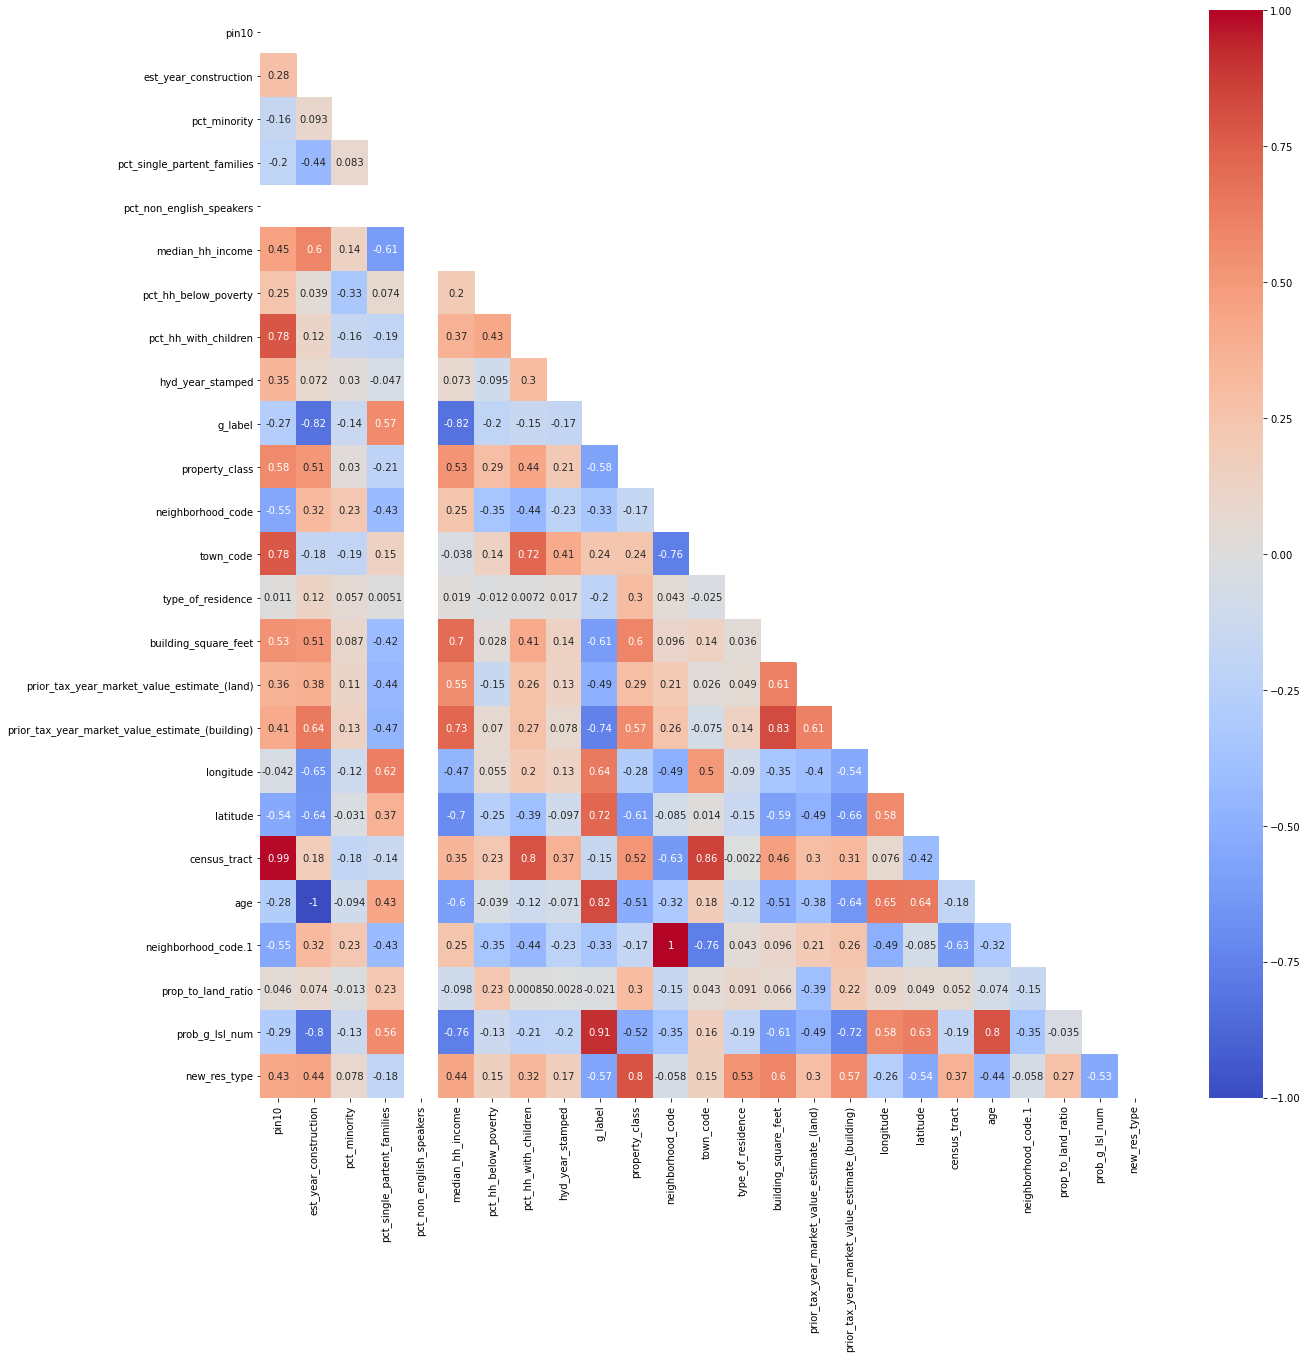

In [17]:
# Heat Map
corr = df.corr()
plt.figure(figsize=(20, 20))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, mask=mask);

In [18]:
# Checking why 'pct_non_english_speakers' is empty
df['pct_non_english_speakers'].value_counts()

0    3757
Name: pct_non_english_speakers, dtype: int64

In [19]:
df.shape

(3757, 28)

In [20]:
# Dropping this columns, it contains zeros only
df.drop(columns=['pct_non_english_speakers'], inplace=True)

In [21]:
df.shape

(3757, 27)

# 3.  MODELS
### Models using the variables that were used by Blue Conduit in Hazel Crest.  Since we don't know which models were used, we will need to test at least three

In [22]:
df.columns

Index(['pin10', 'est_year_construction', 'pct_minority',
       'pct_single_partent_families', 'median_hh_income',
       'pct_hh_below_poverty', 'pct_hh_with_children', 'resident_type',
       'hyd_year_stamped', 'g_label', 'prob_g_lsl', 'property_class',
       'neighborhood_code', 'town_code', 'type_of_residence',
       'building_square_feet', 'prior_tax_year_market_value_estimate_(land)',
       'prior_tax_year_market_value_estimate_(building)', 'longitude',
       'latitude', 'census_tract', 'property_address', 'age',
       'neighborhood_code.1', 'prop_to_land_ratio', 'prob_g_lsl_num',
       'new_res_type'],
      dtype='object')

In [23]:
# These are the original variables
X = df[['est_year_construction', 'prior_tax_year_market_value_estimate_(building)', 'prop_to_land_ratio',
       'new_res_type', 'hyd_year_stamped']]
y = df['prob_g_lsl_num']

In [24]:
# Setting up the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [25]:
# Checking the % value of each class
print(y_train.value_counts(normalize=True))
print('------')
print(y_train.value_counts())

3    0.399361
2    0.337238
1    0.127796
4    0.127441
5    0.008165
Name: prob_g_lsl_num, dtype: float64
------
3    1125
2     950
1     360
4     359
5      23
Name: prob_g_lsl_num, dtype: int64


## 3.1 Logistic Regression

In [26]:
# Listing the params so I can propery enter their name if needed
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [27]:
# Changed max_iter to avoid a warning message
lr = LogisticRegression(max_iter=10_000)

In [28]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [29]:
lr.score(X_train, y_train)

0.6144834930777423

### 3.1.2 Pipeline to find best params

In [30]:
# Creating a pipeline
pipe = Pipeline([
    ('lr', LogisticRegression())
])

In [31]:
# Getting the params names that I will need to use 
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'lr', 'lr__C', 'lr__class_weight', 'lr__dual', 'lr__fit_intercept', 'lr__intercept_scaling', 'lr__l1_ratio', 'lr__max_iter', 'lr__multi_class', 'lr__n_jobs', 'lr__penalty', 'lr__random_state', 'lr__solver', 'lr__tol', 'lr__verbose', 'lr__warm_start'])

In [35]:
# Checking params one at the time so the system doesn't crash
params = {
    'lr__max_iter':[100, 1000, 10000, 20000],
    #'lr__penalty': ['l2', 'l2'],
    #'lr__C': [0.01, 0.1, 1, 50, 100, 150, 200],
    #'lr__class_weight': ['balanced', None],
    
    
};

# This is the Grdsearch
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

C:\Users\Ale\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ale\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

0.6166024211732991


{'lr__max_iter': 10000}

In [36]:
# Checking params one at the time so the system doesn't crash
params = {
    'lr__max_iter':[10000],
    'lr__penalty': ['l2', 'l2']
    #'lr__C': [0.01, 0.1, 1, 50, 100, 150, 200],
    #'lr__class_weight': ['balanced', None],
    
}

# This is the Grdsearch
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.6166024211732991


{'lr__max_iter': 10000, 'lr__penalty': 'l2'}

In [37]:
# Checking params one at the time so the system doesn't crash
params = {
    'lr__max_iter':[10000],
    'lr__penalty': ['l2'],
    'lr__C': [0.01, 0.1, 1, 50, 100, 150, 200],
    #'lr__class_weight': ['balanced', None],   
}

# This is the Grdsearch
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.6187326001788797


{'lr__C': 100, 'lr__max_iter': 10000, 'lr__penalty': 'l2'}

In [38]:
# Checking params one at the time so the system doesn't crash
params = {
    'lr__max_iter':[10000],
    'lr__penalty': ['l2'],
    'lr__C': [100],
    'lr__class_weight': ['balanced', None],    
    
}

# This is the Grdsearch
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_


0.6187326001788797


{'lr__C': 100,
 'lr__class_weight': None,
 'lr__max_iter': 10000,
 'lr__penalty': 'l2'}

## 3.2  Random Forest Classifier

In [39]:
# Creating a pipeline for the Random Forest  Classifier

pipe_rf = Pipeline([
    ('ss', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42)) 
])

In [40]:
# Params for the Random Forest Classifier
params_rf = {
    'rf__n_estimators': [50],
    'rf__max_depth': [40],
    'rf__min_samples_leaf': [2],
    'rf__min_samples_split': [2] 
}

#Gridsearch for the Random Forest Classifier
gs_rf = GridSearchCV(pipe_rf, param_grid=params_rf)
gs_rf.fit(X_train, y_train)
print(gs_rf.best_score_)
gs_rf.best_params_


0.8910175982263204


{'rf__max_depth': 40,
 'rf__min_samples_leaf': 2,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 50}

## 3.3 Gradient Boost

In [41]:
# Pipeline for Gradient Boost
pipe_boost = Pipeline([
    ('ss', StandardScaler()),
    ('boost', GradientBoostingClassifier(random_state=42, n_iter_no_change=10000))
])

In [42]:
# Params for Gradient Boost
params_boost = {
    'boost__loss': ['deviance'],
    'boost__learning_rate': [.3],
    'boost__n_estimators': [100],
    'boost__min_samples_leaf': [1],
    'boost__min_samples_split': [4],
    'boost__max_depth': [3]
    
}

# Gridsearch for Gradient Boost
gs_boost = GridSearchCV(pipe_boost, param_grid=params_boost)
gs_boost.fit(X_train, y_train)
print(gs_boost.best_score_)
#gs_boost.best_params_

0.880012723127118


# 4. Fitting the model and Classification Metrics

In [43]:
# Fitting the Model's Pipelines
pipe.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)
pipe_boost.fit(X_train, y_train)

C:\Users\Ale\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ss', StandardScaler()),
                ('boost',
                 GradientBoostingClassifier(n_iter_no_change=10000,
                                            random_state=42))])

In [44]:
# Print out Scores for the models
print(f'Logistic Regression Train Score is: {gs.score(X_train,y_train)}')
print(f'Logistic Regression Test Score is: {gs.score(X_test,y_test)}')


print(f'Random Forest Train Score is: {gs_rf.score(X_train,y_train)}')
print(f'Random Forest Test Score is: {gs_rf.score(X_test,y_test)}')


print(f'Boosted Trees Train Score is: {gs_boost.score(X_train,y_train)}')
print(f'Boosted Tress Test Score is: {gs_boost.score(X_test,y_test)}')

Logistic Regression Train Score is: 0.6141285055023075
Logistic Regression Test Score is: 0.6723404255319149
Random Forest Train Score is: 0.9801206957756479
Random Forest Test Score is: 0.9234042553191489
Boosted Trees Train Score is: 0.9829605963791267
Boosted Tress Test Score is: 0.9042553191489362


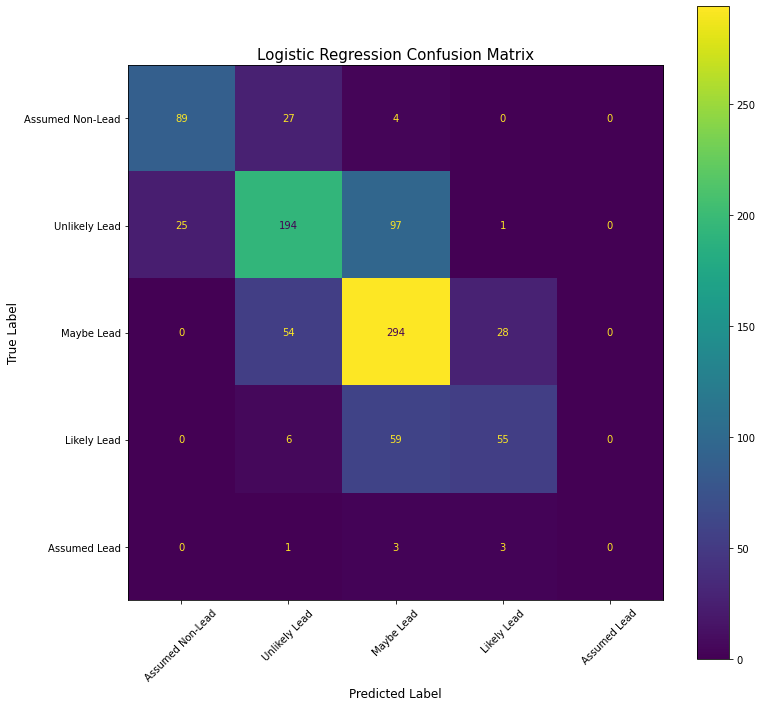

In [45]:
# Confusion Matrix for Linear Regression

fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(gs, X_test, y_test, display_labels=[ 'Assumed Non-Lead', 'Unlikely Lead', 'Maybe Lead',
                                                          'Likely Lead','Assumed Lead'], ax=ax)
plt.xticks(rotation=45)
plt.title('Logistic Regression Confusion Matrix', size=15)
plt.xlabel('Predicted Label', size=12)
plt.ylabel('True Label', size=12);

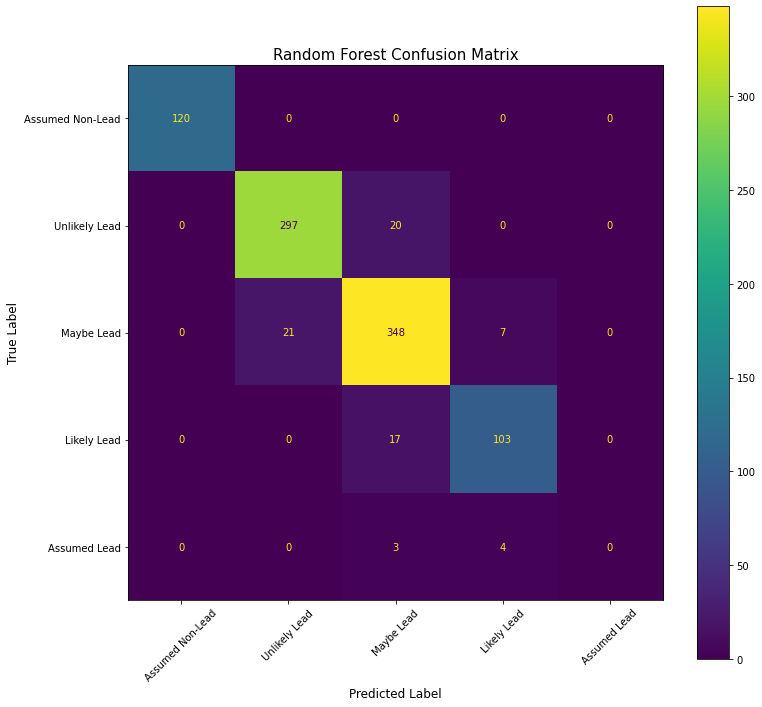

In [46]:
# Confusion matrix for RAndom Forest Classifier

fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(gs_rf, X_test, y_test, display_labels=[ 'Assumed Non-Lead', 'Unlikely Lead', 'Maybe Lead',
                                                          'Likely Lead','Assumed Lead'], ax=ax)
plt.xticks(rotation=45)
plt.title('Random Forest Confusion Matrix', size=15)
plt.xlabel('Predicted Label', size=12)
plt.ylabel('True Label', size=12);

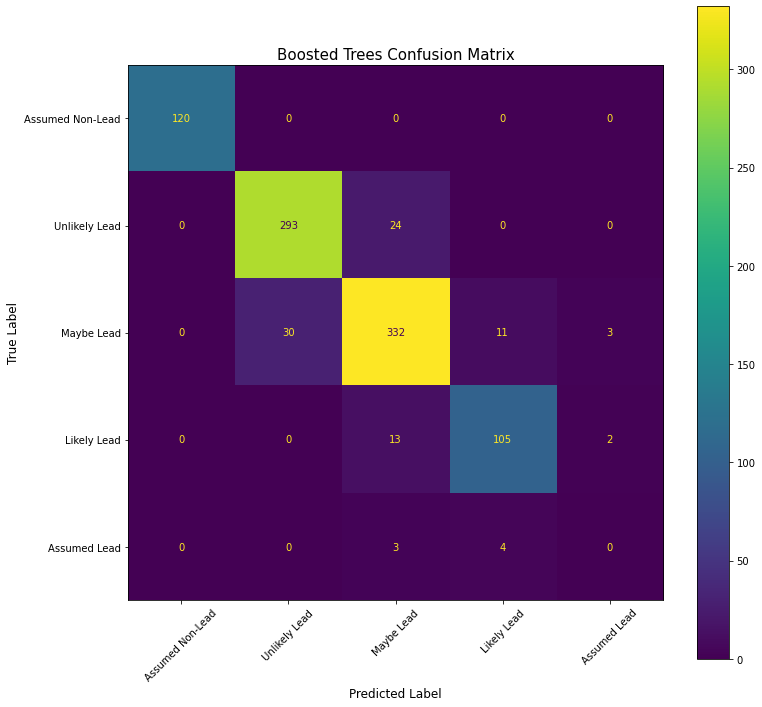

In [47]:
# Confusion matrix fro Gradient Boost

fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(gs_boost, X_test, y_test, display_labels=[ 'Assumed Non-Lead', 'Unlikely Lead', 'Maybe Lead',
                                                          'Likely Lead','Assumed Lead'], ax=ax)
plt.xticks(rotation=45)
plt.title('Boosted Trees Confusion Matrix', size=15)
plt.xlabel('Predicted Label', size=12)
plt.ylabel('True Label', size=12);

In [48]:
# Checking that the size of the y_test matches the sum of the values in the confusion matrix
import sklearn.metrics as metrics
preds_boost = gs_boost.predict(X_test)
metrics.confusion_matrix(y_test, preds_boost), print(f'This is the shape of the y_test: {y_test.shape[0]}')

This is the shape of the y_test: 940


(array([[120,   0,   0,   0,   0],
        [  0, 293,  24,   0,   0],
        [  0,  30, 332,  11,   3],
        [  0,   0,  13, 105,   2],
        [  0,   0,   3,   4,   0]], dtype=int64),
 None)

# 5. Classification Metrics for Gradient Boost Model

In [49]:
# Inspiration https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, preds_boost)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, preds_boost, average='micro', zero_division=0)))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, preds_boost, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, preds_boost, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, preds_boost, average='macro', zero_division=0)))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, preds_boost, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, preds_boost, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, preds_boost, average='weighted', zero_division=0)))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, preds_boost, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, preds_boost, average='weighted')))



Accuracy: 0.90

Micro Precision: 0.90
Micro Recall: 0.90
Micro F1-score: 0.90

Macro Precision: 0.73
Macro Recall: 0.74
Macro F1-score: 0.74

Weighted Precision: 0.90
Weighted Recall: 0.90
Weighted F1-score: 0.90


# 6. Using more variables for the selected model
### Adding:  
* 'pct_single_partent_families', 
* 'median_hh_income', 
* 'building_square_feet', 
* 'longitude', 
* ' latitude'


In [50]:
# New set of variables
X2 = df[['est_year_construction', 'prior_tax_year_market_value_estimate_(building)', 'prop_to_land_ratio',
       'new_res_type', 'hyd_year_stamped', 'pct_single_partent_families', 'median_hh_income', 'building_square_feet',
        'longitude', 'latitude']]

y = df['prob_g_lsl_num']

In [51]:
# New train test split. Y is the same so I don't change the name
X_train2, X_test2, y_train, y_test = train_test_split(X2, y, random_state=42, stratify=y)

In [52]:
# Comparing the previous models with the new set of variables.  
# Had to increase max_iter=20_000 in the logreg to avoid warning.

# Logistic Regression
logreg2 = LogisticRegression(penalty='l2', C=200, class_weight=None, max_iter=20_000)

# Random Forest Classifier
rf2 = RandomForestClassifier(n_estimators=50, max_depth = 40, min_samples_leaf = 2, min_samples_split = 2)

# Gradient Boost
boost2 =  GradientBoostingClassifier(loss = 'deviance', learning_rate = .3, n_estimators = 100, 
                                     min_samples_leaf = 1, min_samples_split = 4, max_depth = 3)

In [53]:
# Fitting the models
logreg2.fit(X_train2, y_train)
rf2.fit(X_train2, y_train)
boost2.fit(X_train2, y_train)

GradientBoostingClassifier(learning_rate=0.3, min_samples_split=4)

In [54]:
# Printing out Scores for the models

print(f'Logistic Regression Train Score is: {logreg2.score(X_train2,y_train)}')
print(f'Logistic Regression Test Score is: {logreg2.score(X_test2,y_test)}')

print(f'Random Forest Train Score is: {rf2.score(X_train2,y_train)}')
print(f'Random Forest Test Score is: {rf2.score(X_test2,y_test)}')

print(f'Boosted Trees Train Score is: {boost2.score(X_train2,y_train)}')
print(f'Boosted Tress Test Score is: {boost2.score(X_test2,y_test)}')

Logistic Regression Train Score is: 0.7234646787362442
Logistic Regression Test Score is: 0.7670212765957447
Random Forest Train Score is: 0.9865104721334753
Random Forest Test Score is: 0.9382978723404255
Boosted Trees Train Score is: 1.0
Boosted Tress Test Score is: 0.9478723404255319


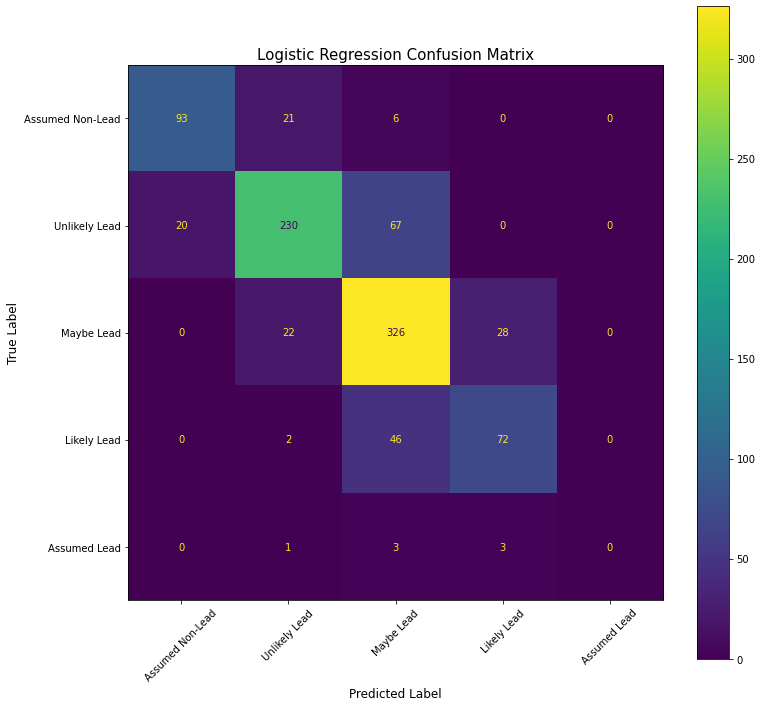

In [55]:
# Confusion Matrix for Logistic Regression

fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(logreg2, X_test2, y_test, display_labels=[ 'Assumed Non-Lead', 'Unlikely Lead', 'Maybe Lead',
                                                          'Likely Lead','Assumed Lead'], ax=ax)
plt.xticks(rotation=45)
plt.title('Logistic Regression Confusion Matrix', size=15)
plt.xlabel('Predicted Label', size=12)
plt.ylabel('True Label', size=12);

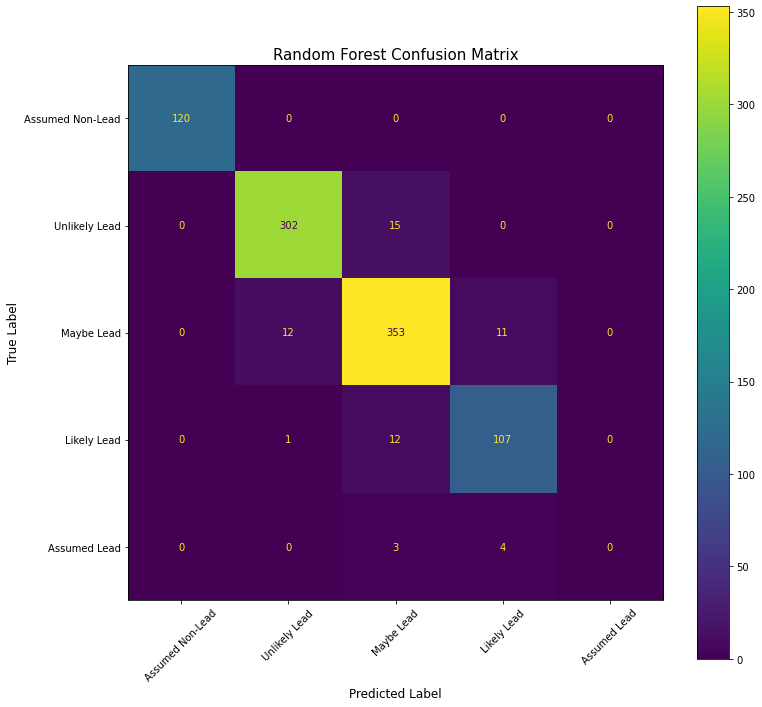

In [56]:
# Confusion matrix for Random Forest

fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(rf2, X_test2, y_test, display_labels=[ 'Assumed Non-Lead', 'Unlikely Lead', 'Maybe Lead',
                                                          'Likely Lead','Assumed Lead'], ax=ax)
plt.xticks(rotation=45)
plt.title('Random Forest Confusion Matrix', size=15)
plt.xlabel('Predicted Label', size=12)
plt.ylabel('True Label', size=12);

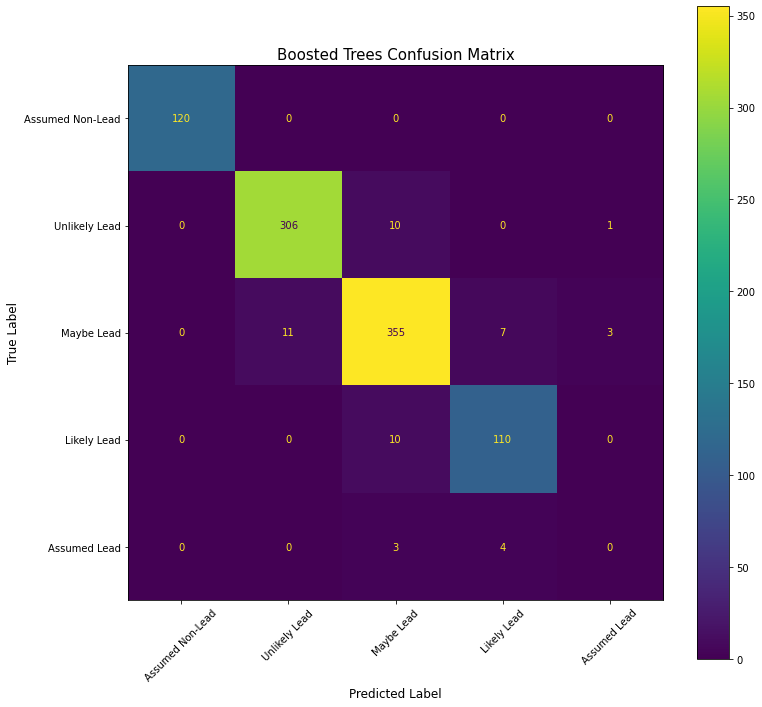

In [57]:
# Confusion matrix for Gradient Boost

fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(boost2, X_test2, y_test, display_labels=[ 'Assumed Non-Lead', 'Unlikely Lead', 'Maybe Lead',
                                                          'Likely Lead','Assumed Lead'], ax=ax)
plt.xticks(rotation=45)
plt.title('Boosted Trees Confusion Matrix', size=15)
plt.xlabel('Predicted Label', size=12)
plt.ylabel('True Label', size=12);

In [58]:
# For the prediction I'm choosing the best model which was the gradient booster

y_pred2 = boost2.predict(X_test2)

In [59]:
# Inspiration https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred2)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred2, average='micro', zero_division=0)))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred2, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred2, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred2, average='macro', zero_division=0)))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred2, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred2, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred2, average='weighted', zero_division=0)))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred2, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred2, average='weighted')))


Accuracy: 0.95

Micro Precision: 0.95
Micro Recall: 0.95
Micro F1-score: 0.95

Macro Precision: 0.76
Macro Recall: 0.77
Macro F1-score: 0.76

Weighted Precision: 0.94
Weighted Recall: 0.95
Weighted F1-score: 0.95


# 7. Test on the entire dataset

In [62]:
# Re-instantiating the Gradient Boost model

boost2.fit(X_train2, y_train)

GradientBoostingClassifier(learning_rate=0.3, min_samples_split=4)

In [63]:
# Predictions on all X (X2) NOT X_test
real_pred = boost2.predict(X2)

In [64]:
# Adding predictions to df
df['our_pred'] = real_pred

In [65]:
# Looking for where our predictions differ from the data 
df.loc[~(df['prob_g_lsl_num'] == df['our_pred'])].shape

(49, 28)

In [66]:
# Checking how often the predicitions match the data.  3737(entire df) - 3708 = 49.  Our code is correct
df[df['prob_g_lsl_num']==df['our_pred']].shape

(3708, 28)

In [67]:
df.head()

,pin10,est_year_construction,pct_minority,pct_single_partent_families,median_hh_income,pct_hh_below_poverty,pct_hh_with_children,resident_type,hyd_year_stamped,g_label,...,longitude,latitude,census_tract,property_address,age,neighborhood_code.1,prop_to_land_ratio,prob_g_lsl_num,new_res_type,our_pred
0,2930111009,1960,80.064309,57.913669,44107,20.967742,43.884892,two-story,2012,0.310206,...,-87.671160,41.583383,827700.0,16853 CRANE AVE,62,130,8.890308,5,4,3
1,2930125045,1958,80.064309,57.913669,44107,20.967742,43.884892,1-plus-story,2012,0.396199,...,-87.673116,41.580632,827700.0,2305 W 170TH ST,64,130,2.302465,5,2,5
2,2825319003,1959,98.171846,49.226006,49239,17.184644,42.105263,split-level,1996,0.405210,...,-87.691318,41.573429,825503.0,3105 LONGFELLOW AVE,63,260,3.712257,5,3,5
3,2930115006,1967,93.566176,65.337423,35789,7.720588,45.398773,two-story,1988,0.435751,...,-87.666394,41.583720,827700.0,16833 SHEA AVE,55,130,6.131134,5,4,5
4,2825321029,1962,98.171846,49.226006,49239,17.184644,42.105263,one-story,1928,0.514053,...,-87.690178,41.574146,825503.0,3017 LONGFELLOW AVE,60,260,2.069005,5,1,5


In [68]:
# Exporting predictions as new dataset
df.to_csv('./Data/our_predictions.csv')

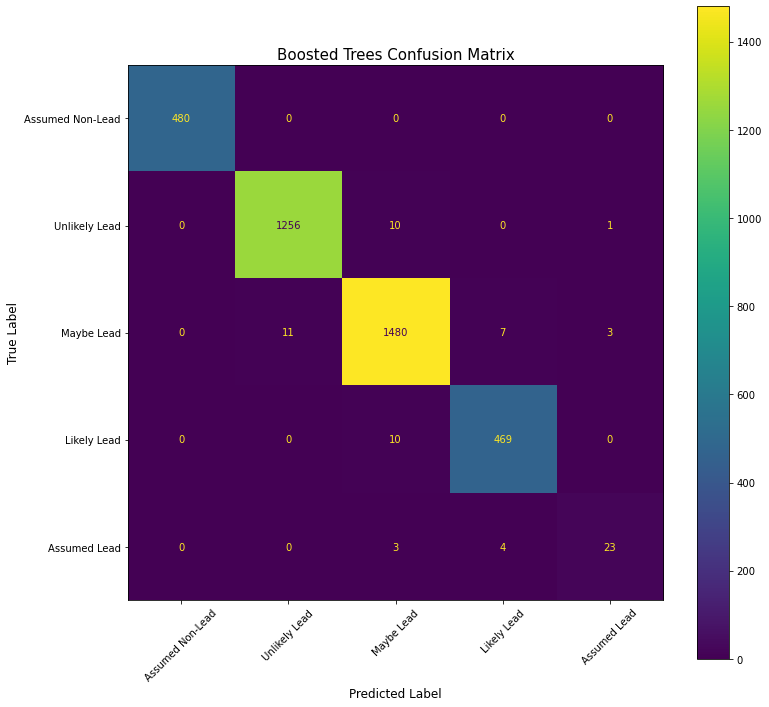

In [69]:
# Confusion matrix for entire dataset
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(boost2, X2, y, display_labels=[ 'Assumed Non-Lead', 'Unlikely Lead', 'Maybe Lead',
                                                          'Likely Lead','Assumed Lead'], ax=ax)
plt.xticks(rotation=45)
plt.title('Boosted Trees Confusion Matrix', size=15)
plt.xlabel('Predicted Label', size=12)
plt.ylabel('True Label', size=12);

In [70]:
# Inspiration https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y, real_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y, real_pred, average='micro', zero_division=0)))
print('Micro Recall: {:.2f}'.format(recall_score(y, real_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y, real_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y, real_pred, average='macro', zero_division=0)))
print('Macro Recall: {:.2f}'.format(recall_score(y, real_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y, real_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y, real_pred, average='weighted', zero_division=0)))
print('Weighted Recall: {:.2f}'.format(recall_score(y, real_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y, real_pred, average='weighted')))


Accuracy: 0.99

Micro Precision: 0.99
Micro Recall: 0.99
Micro F1-score: 0.99

Macro Precision: 0.96
Macro Recall: 0.94
Macro F1-score: 0.95

Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99
